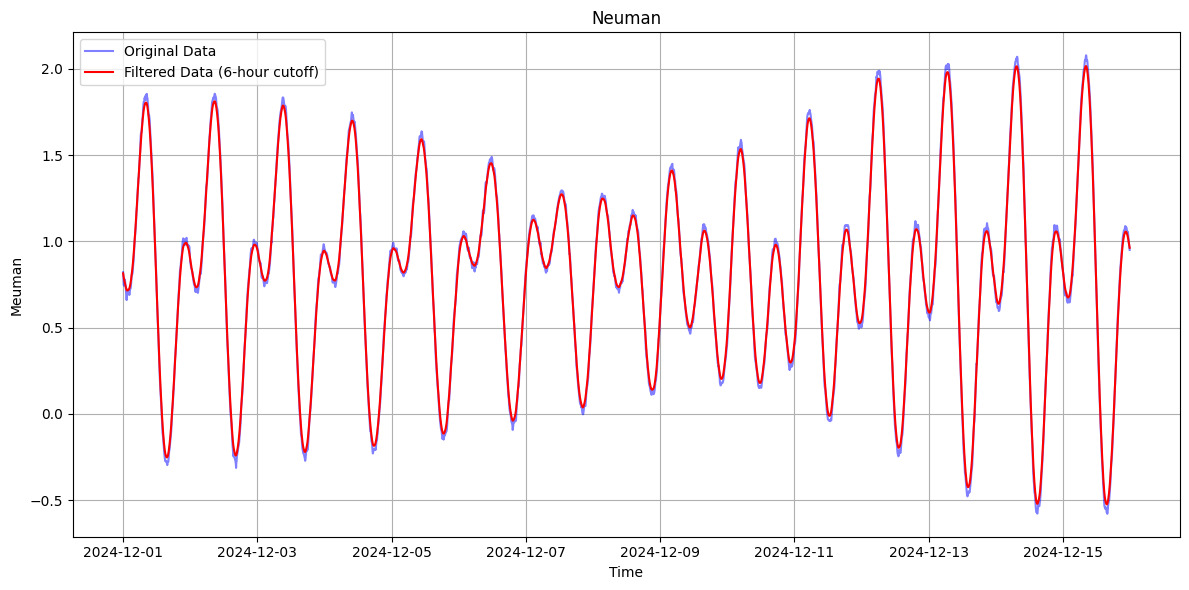

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.metrics import mean_squared_error, r2_score

def butter_lowpass_filter(data, cutoff_period_hours, fs, order):
    """
    Apply a low-pass Butterworth filter to the water depth data.

    Parameters:
    - data: Input signal array (water depth time series)
    - cutoff_period_hours: Period in hours for the cutoff frequency
    - fs: Sampling frequency in Hz (default: 1 Hz for 1-second interval data)
    - order: Order of the filter (default: 5)

    Returns:
    - Filtered signal (low-pass)
    """
    nyq = 0.5 * fs  # Nyquist Frequency
    cutoff_freq = 1 / (cutoff_period_hours * 3600)  # Convert period to frequency (Hz)
    normal_cutoff = cutoff_freq / nyq  # Normalized cutoff frequency

    # Ensure cutoff frequency is within valid range
    if normal_cutoff >= 1:
        raise ValueError("Cutoff frequency is too high. Increase cutoff_period_hours.")

    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)  # Zero-phase filtering

    return filtered_data

data = pd.read_csv(r'G:\My Drive\UCLA\Delft 3D\Backup Output SMBay\Neuman.csv')
time_data1 = pd.to_datetime(data["DateTime"]) # Convert time to datetime format
Neuman = data["Neuman"] 

# Apply the low-pass filter with a cutoff period of 6 hours
cutoff_period_hours = 3
fs = 1/360  # Sampling frequency (1 Hz for 1-second interval data)
order = 1  # Order of the filter
filtered_data = butter_lowpass_filter(Neuman, cutoff_period_hours, fs, order)

# Plot the original and filtered data
plt.figure(figsize=(12, 6))
plt.plot(time_data1, Neuman, label='Original Data', color='blue', alpha=0.5)
plt.plot(time_data1, filtered_data, label='Filtered Data (6-hour cutoff)', color='red')
plt.xlabel('Time')
plt.ylabel('Meuman')
plt.title('Neuman')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

data['Filtered_Neuman'] = filtered_data
data.to_csv(r'G:\My Drive\UCLA\Delft 3D\Backup Output SMBay\Neuman_filtered.csv', index=False)